<a href="https://colab.research.google.com/github/ZappD0S/MLPNS_GZappavigna/blob/main/CART/higgsbosonSearch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


- Download the Higgs boson data from Kaggle (programmatically within the notebook)
see how I did it in the Titanic Trees notebook https://github.com/fedhere/DSPS/blob/master/lab9/titanictree.ipynb

find the correct API link here https://www.kaggle.com/c/higgs-boson/data



- Read in the trainind data. Split the provided training data into a training and a test set. 
The last 2 columns are what you want to predict: "weight" and "label".
Remove them from the input data and create a separate variable label and a separate variable weight, which will be your target variables for, respectively, classification and regression.



In [4]:
!cp -r /content/drive/MyDrive/.kaggle /root

In [7]:
import pandas as pd
higgsdata = pd.read_csv("/content/drive/MyDrive/MLPNS2023/higgs_boson/training.zip")

In [8]:
higgsdata.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b


In [9]:
higgsdata.describe()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,...,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,224999.500000,-49.023079,49.239819,81.181982,57.895962,-708.420675,-601.237051,-709.356603,2.373100,18.917332,...,209.797178,0.979176,-348.329567,-399.254314,-399.259788,-692.381204,-709.121609,-709.118631,73.064591,1.646767
std,72168.927986,406.345647,35.344886,40.828691,63.655682,454.480565,657.972302,453.019877,0.782911,22.273494,...,126.499506,0.977426,532.962789,489.338286,489.333883,479.875496,453.384624,453.389017,98.015662,1.875103
min,100000.000000,-999.000000,0.000000,6.329000,0.000000,-999.000000,-999.000000,-999.000000,0.208000,0.000000,...,13.678000,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.001502
25%,162499.750000,78.100750,19.241000,59.388750,14.068750,-999.000000,-999.000000,-999.000000,1.810000,2.841000,...,123.017500,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-0.000000,0.018636
50%,224999.500000,105.012000,46.524000,73.752000,38.467500,-999.000000,-999.000000,-999.000000,2.491500,12.315500,...,179.739000,1.000000,38.960000,-1.872000,-2.093000,-999.000000,-999.000000,-999.000000,40.512500,1.156188
75%,287499.250000,130.606250,73.598000,92.259000,79.169000,0.490000,83.446000,-4.593000,2.961000,27.591000,...,263.379250,2.000000,75.349000,0.433000,0.503000,33.703000,-2.457000,-2.275000,109.933750,2.404128
max,349999.000000,1192.026000,690.075000,1349.351000,2834.999000,8.503000,4974.979000,16.690000,5.684000,2834.999000,...,2003.976000,3.000000,1120.573000,4.499000,3.141000,721.456000,4.500000,3.142000,1633.433000,7.822543


In [10]:
labels = higgsdata["Label"].values
labels

array(['s', 'b', 'b', ..., 's', 'b', 'b'], dtype=object)

In [11]:
weights = higgsdata["Weight"].values
weights

array([0.00265331, 2.23358449, 2.34738894, ..., 0.01863612, 1.68161144,
       1.87747381])

In [13]:
higgsdata

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,349995,-999.000,71.989,36.548,5.042,-999.00,-999.000,-999.000,1.392,5.042,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,4.505083,b
249996,349996,-999.000,58.179,68.083,22.439,-999.00,-999.000,-999.000,2.585,22.439,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,2.497259,b
249997,349997,105.457,60.526,75.839,39.757,-999.00,-999.000,-999.000,2.390,22.183,...,1,41.992,1.800,-0.166,-999.000,-999.00,-999.000,41.992,0.018636,s
249998,349998,94.951,19.362,68.812,13.504,-999.00,-999.000,-999.000,3.365,13.504,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,1.681611,b


In [15]:
# leave
from sklearn.model_selection import train_test_split 

X = higgsdata.drop(columns=["Label", "Weight", "EventId"]).values

X_train, X_test, weights_train, weights_test, labels_train, labels_test = train_test_split(X, weights, labels, train_size=0.75, stratify=labels)


- Use a Random Forest and a Gradiend Boosted Tree Classifier model to predict the label of the particles. get the score of the model on the training and test set and comment on the result for each model.


In [17]:
#leave 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification

# Look at parameters used by our current forest
rf = RandomForestClassifier(random_state = 0)

print('Parameters currently in use:\n')
print(rf.get_params())

Parameters currently in use:

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}


In [19]:
gbt = GradientBoostingClassifier(random_state=0)

In [18]:
rf.fit(X_train, labels_train)

NameError: ignored

calculate the  scores for the training and test sets and evaluate  overtraining etc

In [20]:
gbt.fit(X_train, labels_train)

GradientBoostingClassifier(random_state=0)

In [22]:
rf.score(X_train, labels_train), rf.score(X_test, labels_test)

(0.999984, 0.83568)

In [24]:
gbt.score(X_train, labels_train), gbt.score(X_test, labels_test)

(0.834224, 0.829968)

C'è una differenza significativa tra lo score
dei dati di training e di test nel caso del RandomForestClassifier. Questo indica che il modello produce overfitting.

Per il GradientBoostingClassifier invece lo score è simile e quindi in questo caso è da preferire.

- Produce a confusion matrix for each model and compare them


 



In [32]:
import matplotlib.pyplot as plt

# I creaded this function (mostly copied from sklearn examples). 
# You can use it to create the confusion matrix
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(y_true, y_pred,
                          normalize=False,
                          title='',
                          cmap=plt.cm.bone):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """         
    if normalize:
          title = title + ' Normalized confusion matrix'
    else:
          title = title + ' Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # plot it
    fig, ax = plt.subplots(1, 1)
    fig.subplots_adjust()
    im = ax.imshow(cm, cmap=cmap)
    ax_divider = make_axes_locatable(ax)
    # add an axes to the right of the main axes.
    plt.xticks([0, 1], labels=["N", "P"])
    plt.ylim(-0.5,1.5)
    plt.yticks([0,1], labels=["N", "P"])    
    plt.title(title)
    cax = ax_divider.append_axes("right", size="10%", pad="2%")
    cb = plt.colorbar(im, cax=cax)
    

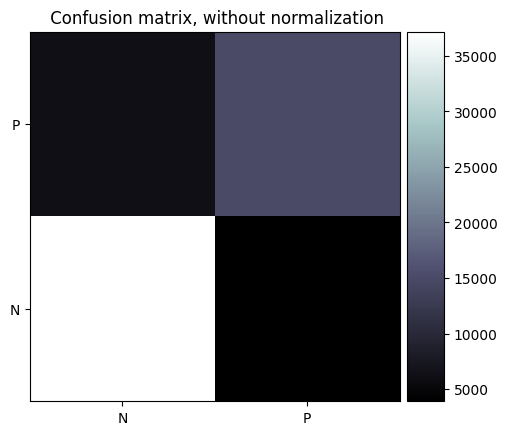

In [33]:
plot_confusion_matrix(labels_test, rf.predict(X_test))

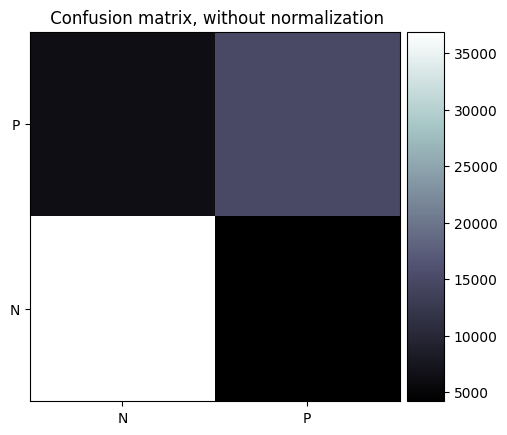

In [34]:
plot_confusion_matrix(labels_test, gbt.predict(X_test))


- Use a Random Forest and a Gradiend Boosted Tree Regressor model to predict the weight of the particles. Compare the model performance on training and test sets


In [ ]:
traindata_weights, testdata_weights, train_weights, tsetsmest_weights = ...

In [35]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
rfR = RandomForestRegressor(n_estimators=100, max_depth=3,
                                  random_state=0)
rfR.fit(X_train, weights_train)
gbtR = GradientBoostingRegressor(random_state=0)
gbtR.fit(X_train, weights_train)

GradientBoostingRegressor(random_state=0)

: Calculate the L2 and L1 loss functions for the fitted regression models (see slides for the definition) and discuss the results

In [39]:
import numpy as np

print("L1 RF:", np.sum(np.abs(rfR.predict(X_test) - weights_test)))
print("L2 RF:", np.sum((rfR.predict(X_test) - weights_test) ** 2))

print("L1 GBT:", np.sum(np.abs(gbtR.predict(X_test) - weights_test)))
print("L2 GBT:", np.sum((gbtR.predict(X_test) - weights_test) ** 2))

# L1 GBT 53154.297722502015

# print("L1 RF....."

L1 RF: 63100.14441639741
L2 RF: 114735.10934279497
L1 GBT: 53042.152808983505
L2 GBT: 85666.2162702009


- For the Random Forest classifier, find the 4 most important features based on the simple unoptimized model you created earlier on. Use the documentation to find out what they are. We have not talked abotu the physics of this problem at all but the Kaggle challenge description should provide enogh information for you to comment on this result is somewhat superficially.

You can use ```rf.feature_importance_``` on the trained model to extract the relative importance of each feature (a number from 0 to 1) and then choose the features that have the 4 highest numbers (the numpy function ```argsort()``` is helpful here!)

Explore the parameter space with the sklearn module ```sklearn.model_selection.RandomizedSearchCV``` *fitting only those 4 features*

Follow this example to set up the parameter search. Set the estimators to 10 and 100, (the number of trees) and the max depth to 3, and 10, and None (let it be unconstrained). Set bootstrap to both True and False. Set the number of features to consider at every split to both "autp" and "sqrt". Use ```pprint``` like I did earlier in this notebook to print the parameters set

**this takes some computational time! so do not start this at the last minute!!**

 



In [48]:
inds = np.argsort(rfR.feature_importances_)
rfR.feature_importances_[inds[-4:]]

array([0.05358139, 0.25595544, 0.29907663, 0.34157885])

In [57]:
from pprint import pprint

random_grid = {"n_estimators": [10, 100], "max_depth": [3, 10, None], "bootstrap": [True, False], "max_features": ["auto", "sqrt"]}
pprint(random_grid)


{'bootstrap': [True, False],
 'max_depth': [3, 10, None],
 'max_features': ['auto', 'sqrt'],
 'n_estimators': [10, 100]}


 mine and your best features do not necessarily have to be the same because our models may be different (different parameters, different random seed etc)

In [58]:
best_features_index = inds[-4:]
higgsdata.iloc[:, best_features_index]

,DER_mass_vis,PRI_jet_num,PRI_jet_subleading_phi,DER_mass_MMC
0,97.827,2,-2.475,138.470
1,103.235,1,-999.000,160.937
2,125.953,1,-999.000,-999.000
3,80.943,0,-999.000,143.905
4,134.805,0,-999.000,175.864
...,...,...,...,...
249995,36.548,0,-999.000,-999.000
249996,68.083,0,-999.000,-999.000
249997,75.839,1,-999.000,105.457
249998,68.812,0,-999.000,94.951


In [60]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
# Random search of parameters, using 3 fold cross validation, 
# search across 18 different combinations
random_search = RandomizedSearchCV(estimator = rf, param_distributions=random_grid,
                                   n_iter=1, cv=3)


Note that this may take a long time! It took 1 hour for me to run this. Dont start at the last minute!!

In [61]:
X_train2 = X_train[:, inds[-4:]]

random_search.fit(X_train2, labels_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0),
                   n_iter=1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [3, 10, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'n_estimators': [10, 100]})

In [64]:
print("Tuned RF  Parameters: {}".format(random_search.best_params_))
print("Best score is {}".format(random_search.best_score_))


Tuned RF  Parameters: {'n_estimators': 10, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': True}
Best score is 0.684704


In [ ]:
random_search.best_params_

In [62]:
df = pd.DataFrame(random_search.cv_results_)


In [63]:
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_features,param_max_depth,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,5.180969,0.423937,0.393575,0.066623,10,sqrt,None,True,"{'n_estimators': 10, 'max_features': 'sqrt', '...",0.685056,0.6836,0.685456,0.684704,0.000798,1


# Plot a simple 3-point ROC curve for the model with the best parameters found in the previous step. Describe it. 

In [ ]:
rf.fit(traindata, train_label.values.flatten()=="s", max_depth.....)

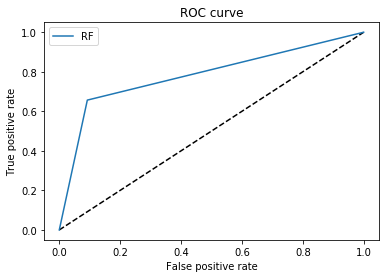

In [ ]:
# The random forest model by itself
from sklearn.metrics import roc_curve
y_pred_grd_rfcat = rf.predict_proba(testdata)[:, 1]

fpr_rf, tpr_rf, _ = roc_curve(test_label.values.flatten()=="s", rf.predict(y_pred_grd_rfcat))

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
